In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] =df["job_skills"].apply(lambda x :ast.literal_eval(x) if pd.notna(x) else x)

# How well do jobs and skills pay for Data Analysts?

1) Evaluate median pay for top 6 data jobs

In [3]:
df_US = df[df["job_country"]=="United States"].dropna(subset="salary_year_avg")


In [9]:
job_titles = df_US["job_title_short"].value_counts().index[:6].tolist() # top 6 jobs
job_titles 

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [17]:
df_US_top6 = df_US[df_US["job_title_short"].isin(job_titles)]


In [35]:
sorted_job_titles = df_US_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

# Visualization

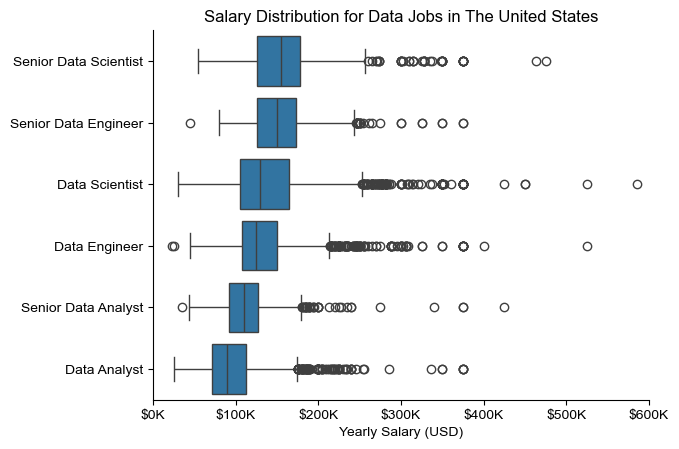

In [46]:
sns.boxplot(data=df_US_top6, x="salary_year_avg",y="job_title_short",order=sorted_job_titles)
sns.set_theme(style="ticks")
sns.despine()
plt.title("Salary Distribution for Data Jobs in The United States")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f"${int(x/1000)}K"))
plt.show()

# Investigate median salary vs skills for Data Analysts

In [49]:
df_DA_US = df[(df["job_title_short"]=="Data Analyst") & (df["job_country"]=="United States")].copy()
df_DA_US = df_DA_US.dropna(subset="salary_year_avg")

In [51]:
df_DA_US = df_DA_US.explode("job_skills")

In [60]:
df_DA_top_pay=df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="median",ascending=False).head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [63]:
df_DA_skills=df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="count",ascending=False).head(10)
df_DA_skills =df_DA_skills.sort_values(by="median",ascending=False)
df_DA_skills 

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


# Visualization


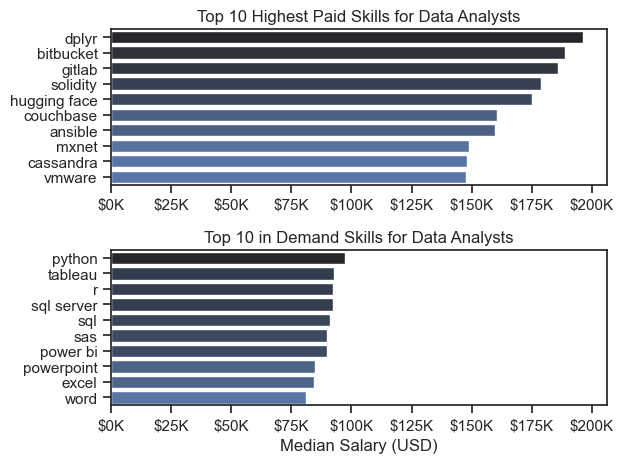

In [85]:
fig,ax = plt.subplots(2,1)
sns.set_theme(style="ticks")
sns.barplot(data=df_DA_top_pay,x="median",y=df_DA_top_pay.index,ax=ax[0],hue="median",palette="dark:b_r")
ax[0].legend().remove()
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x/1000)}K"))

sns.barplot(data=df_DA_skills,x="median",y=df_DA_skills.index,ax=ax[1],hue="median",palette="dark:b_r")
ax[1].set_title("Top 10 in Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x/1000)}K"))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()
fig.tight_layout()
plt.show()